In [1]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy
from config import weather_api_key
import requests
import pprint
from datetime import datetime
import time


In [2]:
lats = np.random.uniform(-90.000, 90.000, size=1500)
lngs = np.random.uniform(-180.000, 180.000, size=1500)
coordinates = list(zip(lats, lngs))

In [3]:
cities = []
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    if city not in cities:
        cities.append(city)


['esperance', 'murray bridge', 'banepa', 'wahran', 'saint george', 'rikitea', 'ushuaia', 'chuy', 'wiarton', 'atuona', 'upernavik', 'dubbo', 'talnakh', 'aklavik', 'hilo', 'nikolskoye', 'springdale', 'ariquemes', 'bethel', 'kisangani', 'ponta do sol', 'dikson', 'zhitikara', 'port alfred', 'mayna', 'new norfolk', 'ilulissat', 'mar del plata', 'leh', 'praia', 'catuday', 'vaini', 'hamilton', 'bluff', 'yellowknife', 'cape town', 'imbituba', 'ruatoria', 'sao filipe', 'yulara', 'tiksi', 'thompson', 'kashary', 'khatanga', 'grand river south east', 'hofn', 'puerto ayora', 'mataura', 'nizhneyansk', 'tuktoyaktuk', 'iberia', 'tasiilaq', 'keetmanshoop', 'qaanaaq', 'hobart', 'san juan', 'umzimvubu', 'hobyo', 'orlik', 'lunel', 'seymchan', 'ladario', 'narsaq', 'angoche', 'arawa', 'udachnyy', 'port lincoln', 'barkot', 'saint-philippe', 'chokwe', 'grindavik', 'benguela', 'dargaville', 'ennis', 'busselton', 'strezhevoy', 'cidreira', 'altay', 'souillac', 'port macquarie', 'kodiak', 'tautira', 'trelew', 'ma

In [4]:
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

for i, city in enumerate(cities):
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
    city_url = url + '&q=' + cities[i]

    print(f"Processing Record {record_count} of Set {set_count} | {city} | {i}")
    record_count += 1

    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

    i += 1
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

        

Processing Record 1 of Set 1 | esperance | 0
Processing Record 2 of Set 1 | murray bridge | 1
Processing Record 3 of Set 1 | banepa | 2
Processing Record 4 of Set 1 | wahran | 3
City not found. Skipping...
Processing Record 5 of Set 1 | saint george | 4
Processing Record 6 of Set 1 | rikitea | 5
Processing Record 7 of Set 1 | ushuaia | 6
Processing Record 8 of Set 1 | chuy | 7
Processing Record 9 of Set 1 | wiarton | 8
Processing Record 10 of Set 1 | atuona | 9
Processing Record 11 of Set 1 | upernavik | 10
Processing Record 12 of Set 1 | dubbo | 11
Processing Record 13 of Set 1 | talnakh | 12
Processing Record 14 of Set 1 | aklavik | 13
Processing Record 15 of Set 1 | hilo | 14
Processing Record 16 of Set 1 | nikolskoye | 15
Processing Record 17 of Set 1 | springdale | 16
Processing Record 18 of Set 1 | ariquemes | 17
Processing Record 19 of Set 1 | bethel | 18
Processing Record 20 of Set 1 | kisangani | 19
Processing Record 21 of Set 1 | ponta do sol | 20
Processing Record 22 of Set 

In [7]:
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Esperance,-33.8667,121.9000,62.44,54,74,18.75,AU,2021-11-02 01:31:55
1,Murray Bridge,-35.1167,139.2667,90.43,17,92,19.75,AU,2021-11-02 01:31:55
2,Banepa,27.6298,85.5214,53.92,94,20,0.00,NP,2021-11-02 01:31:56
3,Saint George,37.1041,-113.5841,70.39,36,1,1.99,US,2021-11-02 01:30:40
4,Rikitea,-23.1203,-134.9692,72.61,67,100,12.17,PF,2021-11-02 01:29:50
...,...,...,...,...,...,...,...,...,...
568,Olafsvik,64.8945,-23.7142,33.98,67,79,24.16,IS,2021-11-02 01:46:42
569,Bilma,18.6853,12.9164,76.15,16,17,8.72,NE,2021-11-02 01:46:42
570,Kastamonu,41.5000,33.6667,45.88,94,5,0.07,TR,2021-11-02 01:46:43
571,Yerbogachen,61.2767,108.0108,13.46,79,67,11.39,RU,2021-11-02 01:46:43


In [9]:
new_order = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Esperance,AU,2021-11-02 01:31:55,-33.8667,121.9000,62.44,54,74,18.75
1,Murray Bridge,AU,2021-11-02 01:31:55,-35.1167,139.2667,90.43,17,92,19.75
2,Banepa,NP,2021-11-02 01:31:56,27.6298,85.5214,53.92,94,20,0.00
3,Saint George,US,2021-11-02 01:30:40,37.1041,-113.5841,70.39,36,1,1.99
4,Rikitea,PF,2021-11-02 01:29:50,-23.1203,-134.9692,72.61,67,100,12.17
...,...,...,...,...,...,...,...,...,...
568,Olafsvik,IS,2021-11-02 01:46:42,64.8945,-23.7142,33.98,67,79,24.16
569,Bilma,NE,2021-11-02 01:46:42,18.6853,12.9164,76.15,16,17,8.72
570,Kastamonu,TR,2021-11-02 01:46:43,41.5000,33.6667,45.88,94,5,0.07
571,Yerbogachen,RU,2021-11-02 01:46:43,61.2767,108.0108,13.46,79,67,11.39


In [10]:
output_data_file = 'weather_data/cities.csv'
city_data_df.to_csv(output_data_file, index_label='City_ID')

In [13]:
today = time.strftime('%x')
today

'11/01/21'

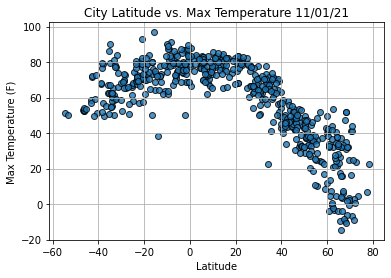

In [17]:
plt.scatter(city_data_df.Lat,
            city_data_df['Max Temp'],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig1.png")

plt.show()

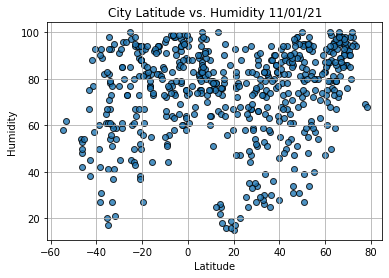

In [25]:
plt.scatter(city_data_df.Lat,
            city_data_df.Humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig2.png")

plt.show()

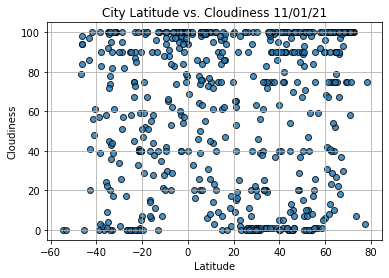

In [24]:
plt.scatter(city_data_df.Lat,
            city_data_df.Cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig3.png")

plt.show()

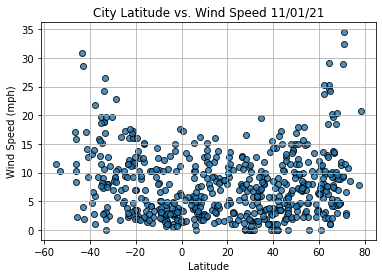

In [23]:
plt.scatter(city_data_df.Lat,
            city_data_df['Wind Speed'],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig4.png")

plt.show()